In [119]:
import pandas as pd
import numpy as np

from scipy.stats import trim_mean
from statsmodels import robust

import seaborn as sns
import matplotlib.pylab as plt
from matplotlib.collections import EllipseCollection
from matplotlib.colors import Normalize

In [120]:
# Data sets path
AIRLINE_STATS_CSV = 'Data/airline_stats.csv'
KC_TAX_CSV =  'Data/kc_tax.csv'
LC_LOANS_CSV =  'Data/lc_loans.csv'
AIRPORT_DELAYS_CSV =  'Data/dfw_airline.csv'
SP500_DATA_CSV = 'Data/sp500_data.csv'
SP500_SECTORS_CSV = 'Data/sp500_sectors.csv'
STATE_CSV = 'Data/state.csv'

In [121]:
def printest(args, value):
    return print( "{} : \n {} \n".format(args, value) )

# Exploratory Data Analysis

# Estimates of Location

Variables containing measured or count data can often possess thousands of unique values. An essential part of data exploration involves identifying a "representative value" for each feature - a value that suggests where the majority of the data points tend to cluster (i.e., their central tendency).

**Mean**

The mean, often referred to as the average, is a measure of the central tendency of a dataset. It is calculated by adding all the values in the dataset and then dividing by the total number of values.

$$\mu = E[X] = \frac{1}{n}\sum_{i = 1}^{n} x_i $$

Here, $x_i$ represents each individual data point, and $n$ is the total number of observations.

The mean provides a useful summary of the data's central location, but it <mark style = 'background: lightblue'>is sensitive to extreme values (outliers)</mark>. The mean $\mu$ represents the expected value of a random variable $E[X]$ under a uniform probability distribution.

**Trimmed (Truncated) Mean**

Is a modified version of the mean. It's computed by first sorting the data values, then excluding a fixed number of values from both ends of the sorted list, and finally, taking the average of the remaining data points. <mark style = 'background: lightblue'>This approach mitigates the impact of outliers and can provide a more representative 'central value' when dealing with skewed data </mark>.

The formula to calculate the trimmed mean, omitting $p$ smallest and largest values, is:

$$E[X]_t = \frac{1}{n-2p}\sum_{i = p+1}^{n-p} x_i $$

Here, $n$ is the total number of observations, $p$ is the number of observations discarded from each end, and $x_i$ represents each individual data point that is included in the trimmed mean calculation. This can be seen as expected value of a truncated distribution.

**Weighted Mean**

Is a generalization of the arithmetic mean that enables us to assign specific weights or importance to each data point. In calculating the weighted mean, each data point is multiplied by a predetermined weight before summation. The sum of these products is then divided by the total of the weights, not just the number of data points. This allows the weighted mean to reflect the relative contribution of each point to the total.

$$E[X] _w = \frac{1}{\sum_{i = 1}^{n} w_i}\sum_{i = 1}^{n} w_ix_i $$

This measure is particularly useful when some data points are intrinsically more significant than others, or when the data collected does not equally represent the different groups that we are interested in measuring.  The weighted mean is the expected value under a non-uniform probability distribution.

**Median**

It is the value that separates the highest half of a data set from the lowest half. In other words, the median is the middle point of a data set. Unlike the mean, the median is not affected by outliers or skewed data. This makes the median a more robust measure than the mean when dealing with data that contains extreme values or is not symmetrically distributed.

To compute the median, the data set must first be sorted in ascending order. If the number of observations, $n$, is odd, the median is the value at position $(n+1)/2$. If $n$ is even, the median is the average of the values at positions $n/2$ and $n/2 + 1$.

The median <mark style = 'background: lightblue'>gives a better measure of central tendency when data is skewed or when there are extreme outliers </mark>. However, in symmetric distributions with no outliers, the mean and the median are often the same or close to each other.

**Conclusion**

The median, while robust to extreme values, only considers the middle value (or the average of the two middle values in case of an even number of observations), effectively discarding the rest of the data. The mean, on the other hand, considers all data points but is heavily influenced by outliers or extreme values.

The trimmed mean attempts to balance this by removing a certain percentage of the largest and smallest values in the dataset, and then calculating the mean of the remaining data. This makes it robust to outliers (like the median) while still utilizing more data than the median does.


Consider the data set containing population and murder
rates (in units of murders per 100,000 people per year) for each US state (2010
Census). Let's compute the mean, trimmed mean, and median for the population:

In [122]:
state = pd.read_csv(STATE_CSV)
state.head(3)

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ


In [123]:
printest('Mean Population',state['Population'].mean())
printest('Truncated Mean Population',trim_mean(state['Population'], 0.1) )
printest('Median Population',state['Population'].median())

Mean Population : 
 6162876.3 

Truncated Mean Population : 
 4783697.125 

Median Population : 
 4436369.5 



Both the truncated mean and the median provide more "typical" population values than the mean, as they are less influenced by any extreme population numbers.

# Estimates of Variability

Variability, also referred to as dispersion, measures whether the data values are tightly clustered or spread out from the central value.

**Variance and Standart Deviation**
The variance is an average of the squared deviations, 

$$\sigma_X^2 = \frac{1}{n}\sum_{i = 1}^{n}(x_i - E[X])^2 $$

and the standard deviation is the square root of the variance:

$$\sigma_X = \sqrt{\frac{1}{n}\sum_{i = 1}^{n}(x_i - E[X])^2} $$

<mark style = 'background: lightblue'>The variance and standard deviation are especially sensitive to outliers since they are based on the squared deviations</mark>


# Exploring the Data Distribution



**The interquartile range (IQR)**

IQR is a measure of variability, based on dividing a dataset into quartiles. It is defined as the difference between the third quartile ($Q_3$) and the first quartile ($Q_1$). 

A quartile divides data into four equal parts, each comprising 25% of the data. $Q_1$ represents the 25th percentile of the data, meaning 25% of data points are less than or equal to this value. $Q_3$ represents the 75th percentile, implying that 75% of data points are less than or equal to this value.

<mark style = 'background: lightblue'>The IQR gives a sense of how spread out the values in a dataset are and is a robust measure of dispersion that is not influenced by outliers</mark>. It is often used in exploratory data analysis to detect outliers and to summarize a large dataset.

- To calculate the IQR
  1. **Ordering the Data**: First, arrange the data in increasing or decreasing order. This step is crucial as the IQR depends on values at specific positions in the ordered dataset.
  2. **Determining Quartiles:**  identify the first quartile ($Q_1$) and the third quartile ($Q_3$). 
      - $Q_1$ is the median (middle value) of the first half of the sorted data.
      - $Q_3$ is the median of the second half of the sorted data.
  3. **Calculating IQR:** Finally, calculate the IQR by subtracting $Q_1$ from $Q_3$. This difference represents the range of the central 50% of the dataset, hence giving a robust measure of dispersion that is not influenced by outliers or extreme values.


- For example, if a dataset has the following values: $[3, 5, 7, 8, 9, 11, 14, 15, 16, 17]$, 
  -  $Q_1$ would be 8 (median of $[3, 5, 7, 8]$), 
  -  $Q_3$ would be 16 (median of $[14, 15, 16, 17]$), 
  -   IQR would be $16 - 8 = 8$.

In [124]:
printest('Standard Deviation Population:',state['Population'].std())
printest('IQR Population',state['Population'].quantile(0.75) - state['Population'].quantile(0.25))


Standard Deviation Population: : 
 6848235.347401142 

IQR Population : 
 4847308.0 



## Boxplots

**Percentiles**

In [125]:
percentages = [0.05, 0.25, 0.5, 0.75, 0.95]
df = pd.DataFrame(state['Murder.Rate'].quantile(percentages))
df.index = [f'{p * 100}%' for p in percentages]
print(df.transpose())

             5.0%  25.0%  50.0%  75.0%  95.0%
Murder.Rate   1.6  2.425    4.0   5.55   6.51


The median is 4 murders per 100,000 people, although there is quite a bit of variability:
the 5th percentile is only 1.6 and the 95th percentile is 6.51.

**Box Plot**

A box plot, also known as a box-and-whisker plot, is a graphical representation of statistical data that illustrates a dataset's key quantiles and potential outliers.

- The box represents the interquartile range (IQR), which is the range between the first quartile (25th percentile) and the third quartile (75th percentile). The line inside the box marks the median (50th percentile).
  
- The whiskers extend from the box to show the overall spread of the data, typically 1.5 times the IQR.
  - The lower whisker point is calculated as $Q_1 - 1.5 IQR$
  - The upper whisker point is calculated as $Q_3 + 1.5 IQR$
  
- Any dots or other markers beyond the whiskers indicate potential outliers.
The box plot provides a summary of a dataset's distribution and is particularly useful for comparing distributions across groups.

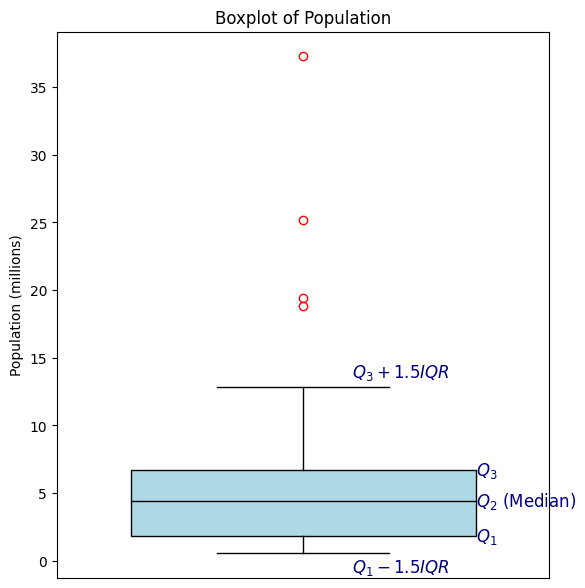

In [126]:
plt.figure(figsize=(6, 6))
plt.boxplot(state['Population']/10e5, widths = 0.7, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='black'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(color='red', markeredgecolor='red'),
            medianprops=dict(color='black'),
            )
q1 = np.percentile(state['Population']/10e5, 25)
q2 = np.percentile(state['Population']/10e5, 50)
q3 = np.percentile(state['Population']/10e5, 75)
iqr = q3-q1

plt.text(1.35, q1, '$Q_1$', va='center',color= 'navy', fontsize = 12)
plt.text(1.35, q2, '$Q_2$ (Median)', va='center', color= 'navy', fontsize = 12)
plt.text(1.35, q3, '$Q_3$', va='center', color= 'navy', fontsize = 12)
plt.text(1.1, q3+1.5*iqr, '$Q_3 + 1.5IQR$', va='center',color= 'navy', fontsize = 12)

# q1-1.5*iqr = 0  because the feature has no negative values
plt.text(1.1, -0.5, '$Q_1 - 1.5IQR$', va='center',color= 'navy', fontsize = 12)

plt.ylabel('Population (millions)')
plt.title('Boxplot of Population')
plt.xticks([])

plt.tight_layout()
plt.show()

## Histograms

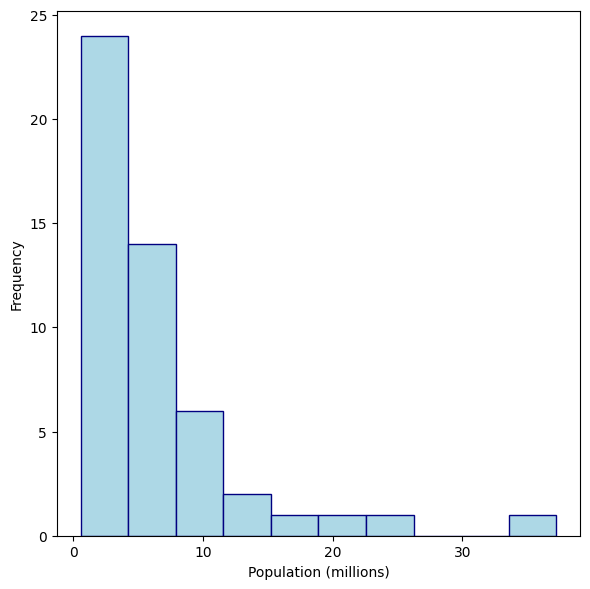

In [127]:
plt.figure(figsize=(6, 6))
plt.hist(state['Population']/10e5, bins = 10, edgecolor = 'navy', color = 'lightblue')

plt.xlabel('Population (millions)')
plt.ylabel('Frequency')
plt.xticks(range(0,40, 10))

plt.tight_layout()
plt.show()

## Density Plots

Related to the histogram is a density plot, which shows the distribution of data values
as a continuous line. Density plot can be thought of as a smoothed histogram,
although it is typically computed directly from the data.

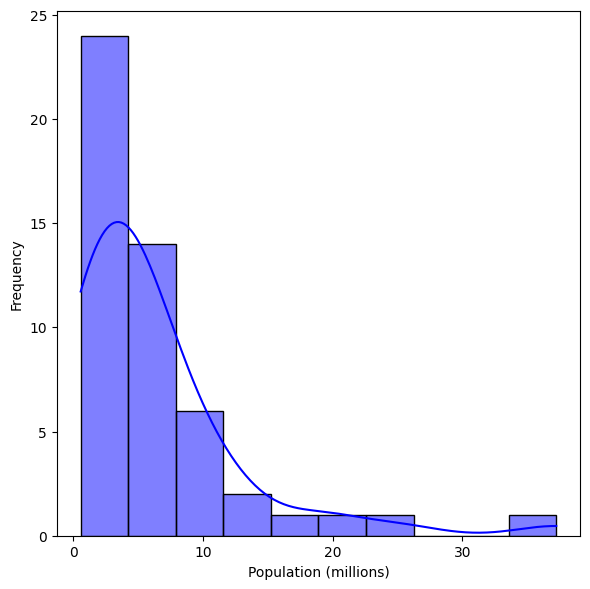

In [128]:
plt.figure(figsize=(6, 6))
sns.histplot(state['Population']/10e5, bins = 10, color = 'blue', kde=True)
plt.xlabel('Population (millions)')
plt.ylabel('Frequency')
plt.xticks(range(0,40, 10))
plt.tight_layout()
plt.show()

# Exploring Binary and Categorical Data

## Bar Plots

In the Data  set for airport delays, each column represents a different cause of delay (Carrier, ATC, Weather, Security, Inbound) at the airport. The single row contains the count of delays associated with each cause. This data could be interpreted as the total number of delays for each cause over a certain time period.

For this case we can use Bar plot by transposing and plotting this data, each bar's height corresponds to the total number of delays due to a particular cause.

In [129]:
dfw = pd.read_csv(AIRPORT_DELAYS_CSV)

# % that each cause of delay contributes to the total delays.
display(100 * dfw / dfw.values.sum())

,Carrier,ATC,Weather,Security,Inbound
0,23.022989,30.400781,4.025214,0.122937,42.428079


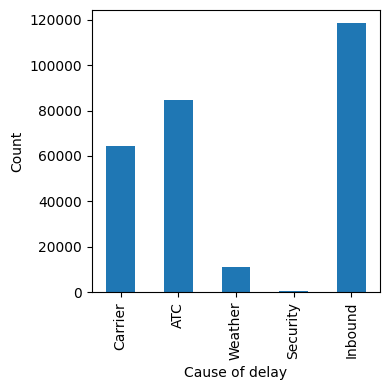

In [130]:
ax = dfw.transpose().plot.bar(figsize=(4, 4), legend=False)
ax.set_xlabel('Cause of delay')
ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

# Correlation

Exploratory data analysis in many modeling projects involves examining correlation among predictors, and between predictors
and a target variable. The variables X and Y are said to be:

- **Positively correlated**: if high values of X go with high values of Y, or vice versa.

- **Negatively correlated**: if high values of X go with low values of Y, and vice versa.

**Pearson's correlation coefficient**

Pearson's correlation coefficient can be used as a measure of dependence between two variables, X and Y. The coefficient provides a value between $[1, −1]$, where:

- 1 is a total positive correlation, 
- 0 is no correlation
- −1 is a total negative correlation. 

the correlation for a pair of random variables $(X, Y)$ is given by:

$$
r(X,Y) = r = \frac{\text{cov}(X,Y)}{\sigma_X \sigma_Y}
$$

In this equation, $\text{cov}(X,Y)$ represents the covariance between X and Y, while $\sigma_X$ and $\sigma_Y$ are the standard deviations of X and Y, respectively. The covariance, a measure of how much two random variables change together, is computed as follows:

$\text{cov}(X,Y) = E[(X - E[X])(Y - E[Y])]$

Here, $E[X]$ and $E[Y]$ are the expected values (or means) of X and Y, respectively. This formula essentially captures the joint variability of X and Y.

The standard deviations, which measure the dispersion or spread of the data points from the mean, are computed as follows:

$$\sigma_X = \sqrt{E[X^2] - E[X]^2}$$
$$\sigma_Y = \sqrt{E[Y^2] - E[Y]^2}$$

<mark style = 'background: lightblue'>Pearson's correlation coefficient can be a valuable tool to understand and visualize the linear relationships between features</mark>. This can inform feature selection, as highly correlated features often carry redundant information.

**Correlation matrix**

The correlation matrix is a table showing correlation coefficients between many features. For pearson's correlation each entry of the matrix shows the pearson's correlation between two variables.

We desire to show the correlation between the daily returns
for telecommunication stocks from July 2012 through June 2015, as follows:

In [131]:
# Symbols of stock companies
sp500_sym = pd.read_csv(SP500_SECTORS_CSV)
# Daily return for each company
sp500_px = pd.read_csv(SP500_DATA_CSV, index_col=0)

display(sp500_sym.head(2))
display(sp500_px.head(2))

,sector,sector_label,sub_sector,symbol
0,information_technology,Technology,data_processing_&_outsourced_services,ADS
1,information_technology,Technology,systems_software,CA


,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,ALTR,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
1993-01-29,0.0,0.060124,-0.022100,0.0,0.0,0.018897,0.007368,0.092165,0.259140,-0.007105,...,0.0,0.0,0.34716,0.0,0.04167,0.00000,0.015564,1.75,0.125,0.0
1993-02-01,0.0,-0.180389,0.027621,0.0,0.0,0.018889,0.018425,0.115207,-0.100775,0.063893,...,0.0,0.0,-0.23144,0.0,0.00000,-0.01041,0.007782,1.25,0.125,0.0


In [132]:
# Telecom companies
telecomSymbols = sp500_sym[sp500_sym['sector'] == 'telecommunications_services']['symbol']
# Filter data for dates July 2012 through June 2015
telecom = sp500_px.loc[sp500_px.index >= '2012-07-01', telecomSymbols]
print('\nTelecom Stocks:')
display(telecom.head(3))

print('\nCorrelation Matrix:')
display(telecom.corr())


Telecom Stocks:


,T,CTL,FTR,VZ,LVLT
2012-07-02,0.422496,0.140847,0.070879,0.554180,-0.519998
2012-07-03,-0.177448,0.066280,0.070879,-0.025976,-0.049999
2012-07-05,-0.160548,-0.132563,0.055128,-0.051956,-0.180000



Correlation Matrix:


,T,CTL,FTR,VZ,LVLT
T,1.000000,0.474683,0.327767,0.677612,0.278626
CTL,0.474683,1.000000,0.419757,0.416604,0.286665
FTR,0.327767,0.419757,1.000000,0.287386,0.260068
VZ,0.677612,0.416604,0.287386,1.000000,0.242199
LVLT,0.278626,0.286665,0.260068,0.242199,1.000000


## Heatmap

We can plot the correlation matrix as a heat map to better visualize the correlation

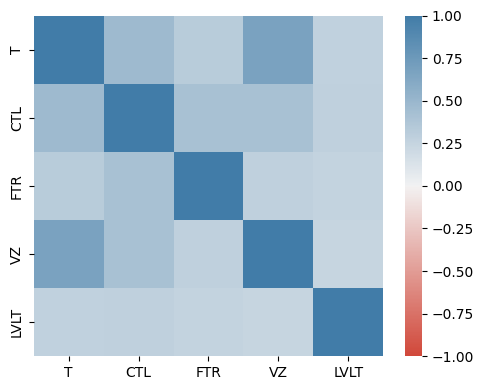

In [133]:
fig, ax = plt.subplots(figsize=(5, 4))
ax = sns.heatmap(telecom.corr(), vmin=-1, vmax=1, 
                 cmap=sns.diverging_palette(15, 240, as_cmap=True),
                 ax=ax)

plt.tight_layout()
plt.show()

Due to the large number of columns in this table, looking at the correlation matrix is cumbersome and it's more convenient to plot the correlation as a heatmap. Now let's plot the correlation for all features in the dataset from July 2012 through June 2015 traded on major exchanges ``(sector == 'etf')``.

In [134]:
majorExcSymbol = sp500_sym[sp500_sym['sector'] == 'etf']['symbol']
etfs = sp500_px.loc[sp500_px.index >= '2012-07-01', majorExcSymbol]
display(etfs.head(2))

,XLI,QQQ,SPY,DIA,GLD,VXX,USO,IWM,XLE,XLY,XLU,XLB,XTL,XLV,XLP,XLF,XLK
2012-07-02,-0.376098,0.096313,0.028223,-0.242796,0.419998,-10.40,0.00,0.534641,0.028186,0.095759,0.098311,-0.093713,0.019076,-0.009529,0.313499,0.018999,0.075668
2012-07-03,0.376099,0.481576,0.874936,0.728405,0.490006,-3.52,0.25,0.926067,0.995942,0.000000,-0.044686,0.337373,0.000000,0.000000,0.129087,0.104492,0.236462


The orientation of the ellipse indicates whether two variables are <mark style = 'background: lightblue' >positively correlated</mark> (ellipse is pointed to the top right) or <mark style = 'background: lightblue' >negatively correlated </mark>
(ellipse is pointed to the top left). The shading and width of the ellipse indicate the
strength of the association: thinner and darker ellipses correspond to stronger
relationships.

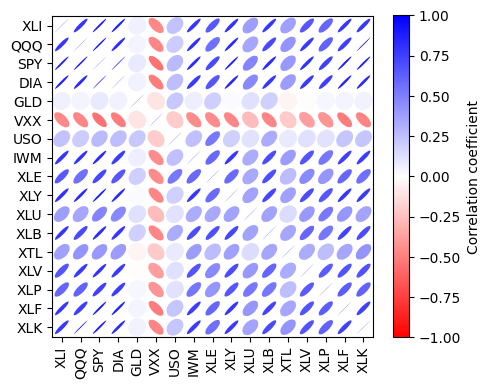

In [135]:
def plot_corr_ellipses(data, figsize=None, **kwargs):
    ''' https://stackoverflow.com/a/34558488 '''
    M = np.array(data)
    if not M.ndim == 2:
        raise ValueError('data must be a 2D array')
    fig, ax = plt.subplots(1, 1, figsize=figsize, subplot_kw={'aspect':'equal'})
    ax.set_xlim(-0.5, M.shape[1] - 0.5)
    ax.set_ylim(-0.5, M.shape[0] - 0.5)
    ax.invert_yaxis()

    # xy locations of each ellipse center
    xy = np.indices(M.shape)[::-1].reshape(2, -1).T

    # set the relative sizes of the major/minor axes according to the strength of
    # the positive/negative correlation
    w = np.ones_like(M).ravel() + 0.01
    h = 1 - np.abs(M).ravel() - 0.01
    a = 45 * np.sign(M).ravel()

    ec = EllipseCollection(widths=w, heights=h, angles=a, units='x', offsets=xy,
                           norm=Normalize(vmin=-1, vmax=1),
                           transOffset=ax.transData, array=M.ravel(), **kwargs)
    ax.add_collection(ec)

    # if data is a DataFrame, use the row/column names as tick labels
    if isinstance(data, pd.DataFrame):
        ax.set_xticks(np.arange(M.shape[1]))
        ax.set_xticklabels(data.columns, rotation=90)
        ax.set_yticks(np.arange(M.shape[0]))
        ax.set_yticklabels(data.index)

    return ec, ax

m, ax = plot_corr_ellipses(etfs.corr(), figsize=(5, 4), cmap='bwr_r')
cb = fig.colorbar(m, ax=ax)
cb.set_label('Correlation coefficient')

plt.tight_layout()
plt.show()

## Scatterplots

The standard way to visualize the relationship between two measured data variables is with a scatterplot. The x-axis represents one variable and the y-axis another, and each point on the graph is a record.

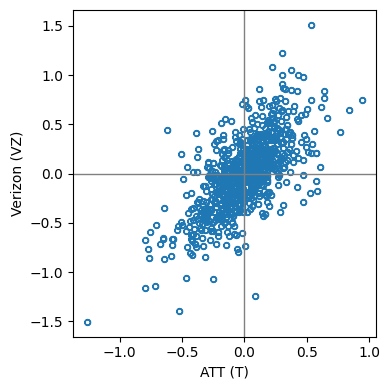

In [136]:
ax = telecom.plot.scatter(x='T', y='VZ', figsize=(4, 4), marker='$\u25EF$')
ax.set_xlabel('ATT (T)')
ax.set_ylabel('Verizon (VZ)')
ax.axhline(0, color='grey', lw=1)
ax.axvline(0, color='grey', lw=1)

plt.tight_layout()
plt.show()

VZ and ATT has a positive correlation: while they cluster around zero, on most
days, the stocks go up or go down.

# Exploring Two or More Variables

Familiar estimators like mean and variance look at variables one at a time (univariate analysis). Correlation analysis is an important method
that compares two variables (bivariate analysis). In this section we look at additional estimates and plots, and at more than two variables (multivariate analysis).

## Numeric Versus Numeric Data

Consider the data set that contains the tax-assessed values for residential properties in King County, Washington.

In [141]:
kc_tax = pd.read_csv(KC_TAX_CSV)
display(kc_tax.head(2))

,TaxAssessedValue,SqFtTotLiving,ZipCode
0,NaN,1730,98117.0
1,206000.0,1870,98002.0


In [150]:
kc_tax = pd.read_csv(KC_TAX_CSV)
# select row with condition and all columns
kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue < 750000) & 
                     (kc_tax.SqFtTotLiving > 100) &
                     (kc_tax.SqFtTotLiving < 3500), :]
display(kc_tax0.head(3))

,TaxAssessedValue,SqFtTotLiving,ZipCode
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0


### Hexagonal binning and Contours 

For data sets with hundreds of thousands or millions of records, a scatterplot will be too dense, so we need a different way to visualize the relationship.

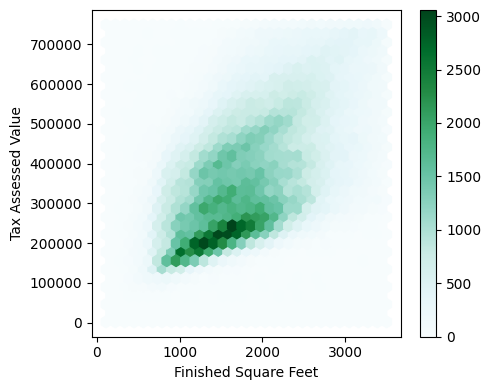

In [143]:
ax = kc_tax0.plot.hexbin(x='SqFtTotLiving', y='TaxAssessedValue',
                         gridsize=30, sharex=False, figsize=(5, 4))
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')

plt.tight_layout()
plt.show()

Rather than plotting points, which would appear as a monolithic dark cloud, we grouped the records into hexagonal bins and plotted the hexagons with a color indicating the number of records in that bin. In this chart, the positive relationship between square feet and tax-assessed value is clear.

We also can use the contour curves. The contours are essentially a topographical map to two variables; each contour band represents a specific density of points, increasing as one nears a “peak.”

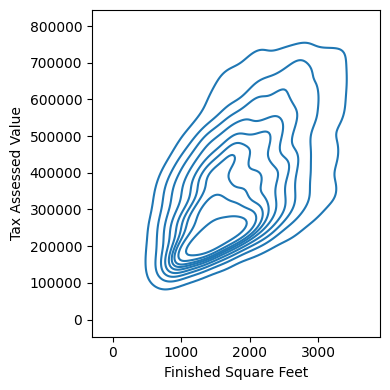

In [144]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.kdeplot(data=kc_tax0.sample(10000), x='SqFtTotLiving', y='TaxAssessedValue', ax=ax)
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')

plt.tight_layout()
plt.show()

### Multiple Variables

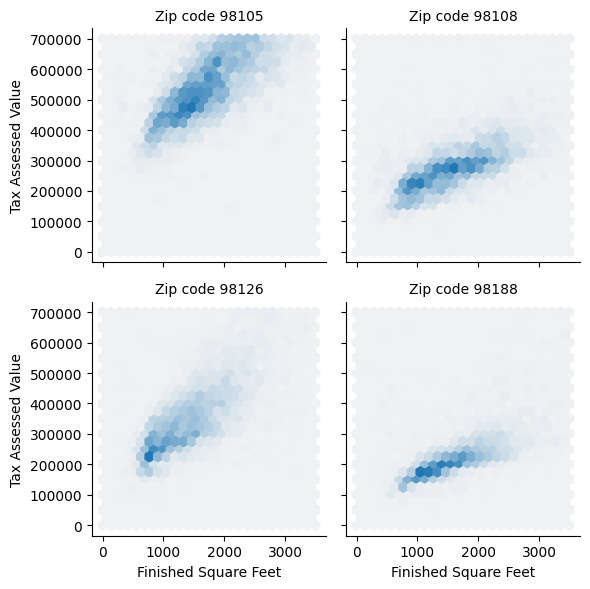

In [152]:
zip_codes = [98188, 98105, 98108, 98126]
kc_tax_zip = kc_tax0.loc[kc_tax0.ZipCode.isin(zip_codes),:]
kc_tax_zip

def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=25, cmap=cmap, **kwargs)

g = sns.FacetGrid(kc_tax_zip, col='ZipCode', col_wrap=2)
g.map(hexbin, 'SqFtTotLiving', 'TaxAssessedValue', 
      extent=[0, 3500, 0, 700000])
g.set_axis_labels('Finished Square Feet', 'Tax Assessed Value')
g.set_titles('Zip code {col_name:.0f}')

plt.tight_layout()
plt.show()

## Two Categorical Variables (Contingency Table)

The data set is taken from data provided by Lending
Club, a leader in the peer-to-peer lending business.The grade goes from A (high) to
G (low). The outcome is either fully paid, current, late, or charged off (the balance of the loan is not expected to be collected).

In [147]:
lc_loans = pd.read_csv(LC_LOANS_CSV)
display(lc_loans.head())

,status,grade
0,Fully Paid,B
1,Charged Off,C
2,Fully Paid,C
3,Fully Paid,C
4,Current,B


A contingency table is a type of table in a matrix format that displays the frequency distribution of the variables. They can provide a basic picture of the interrelation between two categorical variables and can help find interactions between them.

In [157]:
contingency_table = pd.crosstab(lc_loans['grade'], lc_loans['status'], margins= True )
display(contingency_table)

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,1562,50051,20408,469,72490
B,5302,93852,31160,2056,132370
C,6023,88928,23147,2777,120875
D,5007,53281,13681,2308,74277
E,2842,24639,5949,1374,34804
F,1526,8444,2328,606,12904
G,409,1990,643,199,3241
All,22671,321185,97316,9789,450961


## Categorical and Numeric Data

The dataset shows the percentage of flight delays
across airlines.

In [151]:
airline_stats = pd.read_csv(AIRLINE_STATS_CSV)
display(airline_stats.head(3))

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American


Boxplots are a simple way to visually
compare the distributions of a numeric variable grouped according to a categorical
variable.

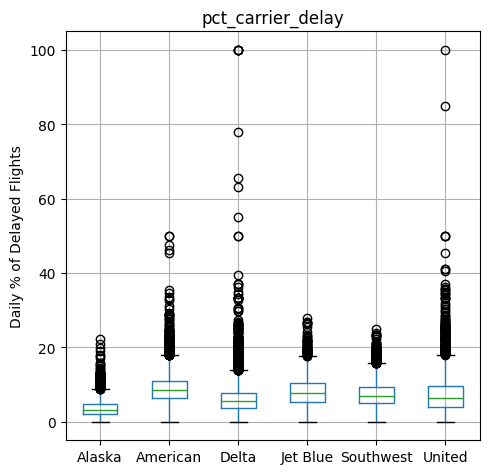

In [158]:
ax = airline_stats.boxplot(by='airline', column='pct_carrier_delay',
                           figsize=(5, 5))
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')
plt.suptitle('')

plt.tight_layout()
plt.show()

Alaska's airline operations show the least amount of delays, while American Airlines displays the most. The difference is so distinct that the lower quartile of American's delay distribution surpasses Alaska's upper quartile.

The relationship can be visualized more effectively through a Violin plot. This plot merges a boxplot with a mirrored and filled density plot, presenting an image similar to a violin. It shows more nuances in the distribution that might be not clear in a boxplot. However, outliers are more apparent in a boxplot.

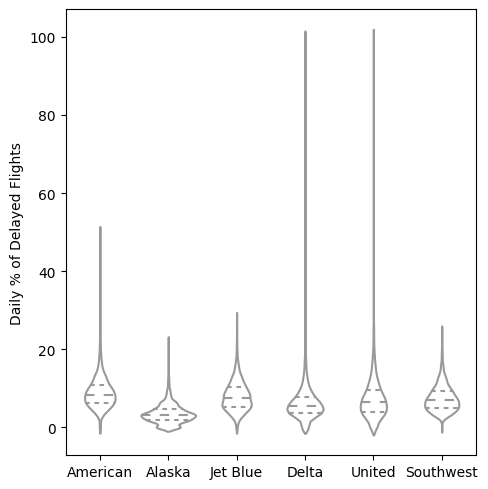

In [159]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.violinplot(data=airline_stats, x='airline', y='pct_carrier_delay',
               ax=ax, inner='quartile', color='white')
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')

plt.tight_layout()
plt.show()

The violin plot specifically highlights a concentration near zero in the delay distribution for Alaska and, to some degree, Delta. This detail is less noticeable in the boxplot.

So in this context, if the violin plot shows a concentration near zero for a particular airline (like Alaska and Delta), it means that most of their flights have close to zero delays.